Here we are going to train ALBERT(A lite BERT) on Double Extra Processed data file, taking 20% not equally sampled examples 


References:- 

[1] TensorFlow Team. (2022, January 11). Classify text with BERT. Retrieved from https://www.tensorflow.org/text/tutorials/classify_text_with_bert

[2] Google. (n.d.). ALBERT: A Lite BERT for Self-supervised Learning of Language Representations. TensorFlow Hub. Retrieved from https://tfhub.dev/google/collections/albert/1

## Importing Libraries

In [ ]:
# Import the `train_test_split` function from the `sklearn.model_selection` module.
from sklearn.model_selection import train_test_split

# Import the `pandas` and `numpy` modules.
import pandas as pd
import numpy as np

# Install the `tf-models-official` package.
!pip install tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 92.0 MB/s eta 0:00:00


In [ ]:
# Install the `tensorflow_text` package.
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the `os` and `shutil` modules to manage files and directories.
import os
import shutil
# Import the `tensorflow` based modules, which provides the core TensorFlow functionality.
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

# Import the `matplotlib.pyplot` module, which provides plotting functionality.
import matplotlib.pyplot as plt
# Set the logging level for TensorFlow to `ERROR` to suppress non-error messages.

tf.get_logger().setLevel('ERROR')

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Load and Preprocess the data

In [ ]:
# Read the JSON file `double_processed.json` into a Pandas DataFrame.
data = pd.read_json("drive/MyDrive/double_processed.json")
# Randomly sample 20% of the DataFrame.
data = data.sample(frac = 0.2)

In [ ]:
# Split the DataFrame `data` into a training set and a test set, with 70% of the data in the training set and 30% in the test set.
df_train, df_test = train_test_split(data, train_size = 0.7)

In [ ]:
# Convert the `df_train` and `df_test` DataFrames to TensorFlow Datasets.
train_data = tf.data.Dataset.from_tensor_slices((df_train.review_text, df_train.is_spoiler))
test_data = tf.data.Dataset.from_tensor_slices((df_test.review_text, df_test.is_spoiler))


- The `shuffle` method randomly reorders the elements in the Dataset.
- The `batch` method groups the elements in the Dataset into batches of the specified size.
- The `cache` method stores the Dataset in memory so that it can be accessed more quickly.
- The `prefetch` method loads the next batch of data into memory in the background so that it is ready to be used when needed.

In [ ]:
train_ds = traicn_data.shuffle(1000).batch(32).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
test_ds = test_data.shuffle(1000).batch(32).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Print the length of the training and test datasets.

In [ ]:
print(len(train_ds))

2511


In [ ]:
print(len(test_ds))

1077


In [ ]:
# Data Snapshot
# Iterate over the first batch of the training dataset
for text_batch, label_batch in train_ds.take(1):
  # Print the first three reviews.
  for i in range(3):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label}')

Review: b'movie visually razzle dazzling funny true cant help excellent far movie musicals go sures beats hell moulin rouge entire cast phenomenal 5 5 stars'
Label : False
Review: b'let say first love novella ive studied stephen kings approach profession many years ive always felt genius top intellective heard though liked darabonts ending thats one reasons went see opening day never againthe last two minutes movie undid rest pointless im sure movie made protest religion protest army wasnt entertainingif know ending want see movie better hurry wont theaters long itll lucky make dvdif could scrub brain would much downeredit several days later still feel way one biggest lost opportunities ive ever witnessed shame'
Label : True
Review: b'first think film underrated isnt bad said perfect film today read review made angry written film bad choice fans bad choice people new world well critics subjective lets read think said new ones wouldnt understand story everything happened fast sentences 

## Get AlBERT from Tensorflow Hub

In [ ]:
# The `tfhub_handle_encoder` variable stores the URL of the TensorFlow Hub module that contains the AlBERT encoder.
# The `tfhub_handle_preprocess` variable stores the URL of the TensorFlow Hub module that contains the AlBERT preprocess model.
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/albert_en_base/2"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/albert_en_preprocess/3"

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/albert_en_base/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/albert_en_preprocess/3


In [ ]:
# Create a TensorFlow Hub layer that loads the BERT preprocess model.
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
# we are basically trying the untrained model on a sample review
text_test = ['this is a sample review']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}') # Printing the keys of the preprocessed text features
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}') # Printing the shape of the "input_word_ids" feature
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')  # Printing the first 12 word ids of the preprocessed text
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}') # Printing the input mask of the preprocessed text
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}') # Printing the type ids of the preprocessed text

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [   2   48   25   21 5717 1487    3    0    0    0    0    0]
Input Mask : [1 1 1 1 1 1 1 0 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Create a TensorFlow Hub layer that loads the BERT encoder model.
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
# Get AlBERT output for sample review
# Obtaining the BERT model outputs for the preprocessed text
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/albert_en_base/2
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[ 0.618563   -0.72348183  0.8599197  -0.837653    0.61795425 -0.9394848
  0.7112744  -0.6955681   0.7173745  -0.99944174  0.8976677   0.6979199 ]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 1.2987084   0.75375986  0.08237098 ... -0.6875163  -0.5177763
   0.8388271 ]
 [ 1.7446368  -0.52049834  0.2768913  ... -0.32677868  1.5841855
  -1.1103501 ]
 [ 1.1025958  -0.7049061  -0.5096793  ...  0.58750874  0.7387592
  -0.59226537]
 ...
 [ 0.63693285  0.66573656 -0.4269878  ... -0.03253026  1.3196608
  -0.67212355]
 [ 0.80189556  0.893147   -0.26008838 ...  0.05817389  1.1864804
  -0.867479  ]
 [ 0.83621645  0.93806195 -0.28230527 ...  0.04839717  1.1642118
  -0.9120718 ]]


## Define Model

In [ ]:
def build_classifier_model():
  """
  This function builds a classifier model using a BERT encoder.
  
  Returns:
    A TensorFlow Keras model.
  """
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
# Create the classifier Model 
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.26186597]], shape=(1, 1), dtype=float32)


In [ ]:
# Print model summary
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

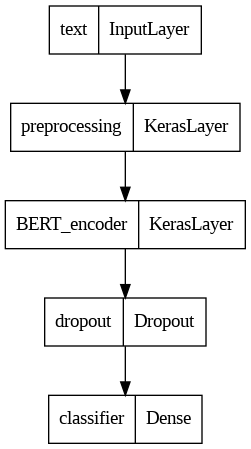

In [ ]:
# Plots the classifier model.
tf.keras.utils.plot_model(classifier_model)

## Model Training

### Loss Function and Metrics

In [ ]:
# Define the loss and metrics for the classifier model.

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

### Optimizer

For fine-tuning, let's use the same optimizer that BERT was originally trained with: the "Adaptive Moments" (Adam). This optimizer minimizes the prediction loss and does regularization by weight decay (not using moments), which is also known as [AdamW](https://arxiv.org/abs/1711.05101).

For the learning rate (`init_lr`), you will use the same schedule as BERT pre-training: linear decay of a notional initial learning rate, prefixed with a linear warm-up phase over the first 10% of training steps (`num_warmup_steps`). 

In [ ]:
epochs = 4
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Compiling Model

In [ ]:
# The model is compiled using the specified optimizer, loss function, and metrics.
classifier_model.compile(optimizer= optimizer,
                         loss=loss,
                         metrics=metrics)

### Training Model

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=test_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/albert_en_base/2
Epoch 1/5
2511/2511 [==============================] - 3098s 1s/step - loss: 0.5306 - binary_accuracy: 0.7494 - val_loss: 0.4931 - val_binary_accuracy: 0.7667
Epoch 2/5
2511/2511 [==============================] - 3084s 1s/step - loss: 0.4967 - binary_accuracy: 0.7626 - val_loss: 0.4923 - val_binary_accuracy: 0.7708
Epoch 3/5
2511/2511 [==============================] - 3087s 1s/step - loss: 0.4732 - binary_accuracy: 0.7738 - val_loss: 0.4986 - val_binary_accuracy: 0.7715
Epoch 4/5
2511/2511 [==============================] - 3088s 1s/step - loss: 0.4472 - binary_accuracy: 0.7905 - val_loss: 0.5222 - val_binary_accuracy: 0.7687
Epoch 5/5
   6/2511 [..............................] - ETA: 45:38 - loss: 0.4348 - binary_accuracy: 0.7969

KeyboardInterrupt: ignored

### Plot Accuracy vs epochs curves

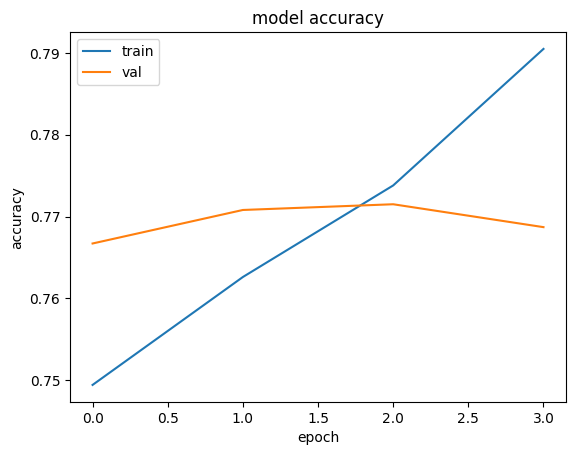

In [ ]:
# Plotting the training and validation accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()




### Plot the loss vs epochs curves

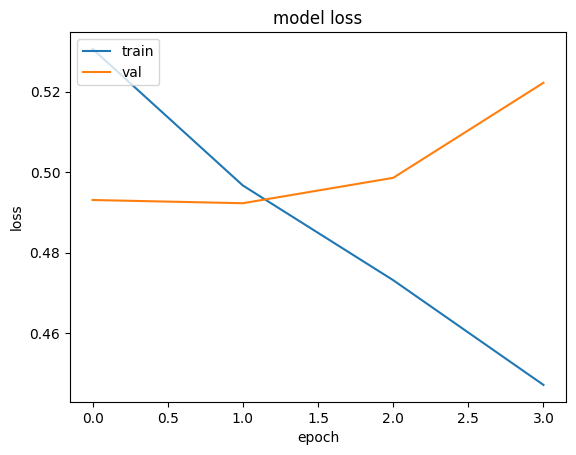

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evalute the Model

- Accuracy
- F1 Score
- Recall
- Precision
- Support

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Predict labels for test data
y_pred = classifier_model.predict(df_test["review_text"])

1077/1077 [==============================] - 334s 310ms/step


In [ ]:
# The model's predictions are in the form of a probability.
# We use the sigmoid function to convert the probabilities to binary values.
y_pred = tf.sigmoid(y_pred)
# We then use the numpy where function to convert any probabilities greater than or equal to 0.5 to 1, and any probabilities less than 0.5 to 0.
y_pred = np.where(y_pred.numpy() >= 0.5, 1, 0)
le = LabelEncoder()
test_labels = le.fit_transform(df_test.is_spoiler)
# We then calculate the precision, recall, fbeta_score, and support for the model's predictions.
precision, recall, fbeta_score, support = precision_recall_fscore_support(test_labels, y_pred)

In [ ]:
le.classes_

array([False,  True])

In [ ]:
np.unique(test_labels)

array([0, 1])

In [ ]:
# Get Precision for both classes
print(precision)

[0.80823015 0.53706093]


In [ ]:
# Get Recall for both classes
print(recall)

[0.87298903 0.415668  ]


In [ ]:
# Get F1 score for both classes
print(fbeta_score)

[0.83936237 0.46863076]


### Confusion Matrix

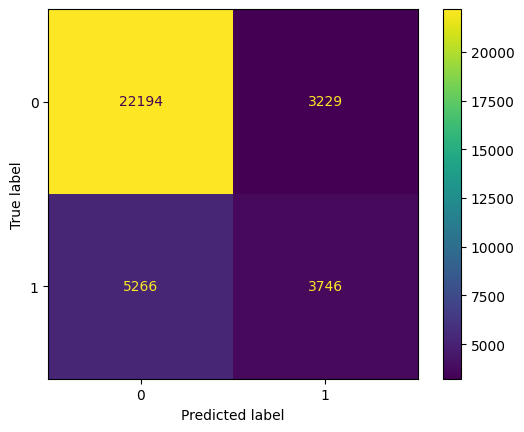

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()